In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

import pandas as pd
from numpy.random import random
import datetime as dt
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from scipy.signal import periodogram
import math

from pytsviz.viz import *

In [3]:
dataset_size=366

In [4]:
n_features = 3

Target series

In [5]:
t_axis = pd.date_range(start='1/1/2020', periods = dataset_size, freq="D", name="t")

In [6]:
y = (1 + random(dataset_size)) * np.linspace(6, 9, dataset_size) + \
    (1 + random(dataset_size)) * np.sin(np.linspace(0, 10*np.pi, dataset_size)) + \
    (1.5 + random(dataset_size)) * np.cos(np.linspace(0, 5.4*np.pi, dataset_size))
ts = pd.Series(index=t_axis, data=y, name="y")
ts_df = ts.to_frame()

Features

In [7]:
feat_matrix = random((n_features, dataset_size))
feat_df = pd.DataFrame(index=t_axis, data={f"x_{i}": feat_matrix[i] for i in range(n_features)})

Forecast

In [8]:
ext_t_axis = pd.date_range(start='2/1/2020', periods = dataset_size, freq="D", name="t")

In [9]:
y_hat = y * (1 + 0.1 * random())

forecast = pd.Series(index=ext_t_axis, data=y_hat, name="y_hat")
forecast_df = forecast.to_frame()

In [10]:
c_lower = [y_hat[i] - (0.001 * i) ** 1.2 for i in range(len(y_hat))]
c_upper = [y_hat[i] + (0.001 * i) ** 1.2 for i in range(len(y_hat))]
confidence_df = pd.DataFrame(index=ext_t_axis, data={"lower confidence": c_lower, "upper confidence": c_upper})

In [11]:
total_df = pd.concat([ts, feat_df, forecast_df, confidence_df], axis = 1)

In [12]:
total_df

y       x_0       x_1       x_2      y_hat  \
t                                                                
2020-01-01  10.350992  0.175342  0.307916  0.299011        NaN   
2020-01-02  11.480891  0.913726  0.513225  0.250678        NaN   
2020-01-03  10.073584  0.180977  0.751943  0.726957        NaN   
2020-01-04   9.692414  0.862240  0.921467  0.487913        NaN   
2020-01-05   9.230577  0.627508  0.442583  0.674530        NaN   
...               ...       ...       ...       ...        ...   
2021-01-27        NaN       NaN       NaN       NaN  13.279186   
2021-01-28        NaN       NaN       NaN       NaN  10.643662   
2021-01-29        NaN       NaN       NaN       NaN   8.712006   
2021-01-30        NaN       NaN       NaN       NaN  16.587274   
2021-01-31        NaN       NaN       NaN       NaN  10.641085   

            lower confidence  upper confidence  
t                                               
2020-01-01               NaN               NaN  
2020-01-02               NaN               NaN  
2020-01-03               NaN               NaN  
2020-01-04               NaN               NaN  
2020-01-05               NaN               NaN  
...                      ...               ...  
2021-01-27         12.984738         13.573635  
2021-01-28         10.348235         10.939089  
2021-01-29          8.415600          9.008413  
2021-01-30         16.289887         16.884661  
2021-01-31         10.342718         10.939453  

[397 rows x 7 columns]

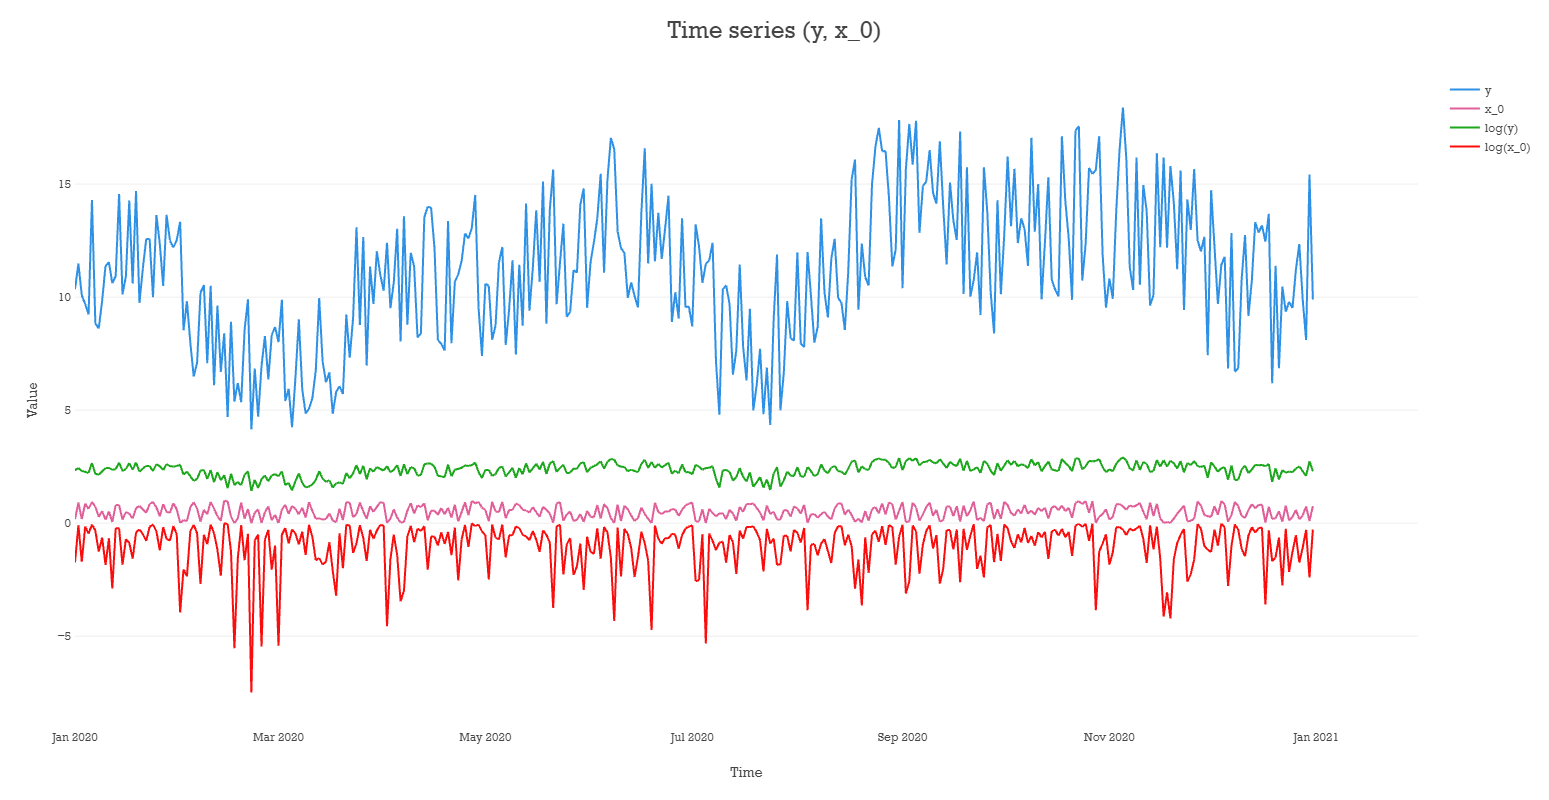

In [61]:
fig = time_series_plot(total_df, y_cols=["y", "x_0"], tf="log", tf_args = (np.e,), keep_original=True)

In [14]:
func1 = lambda x : x.isocalendar().week
func2 = lambda x : x.isocalendar().day

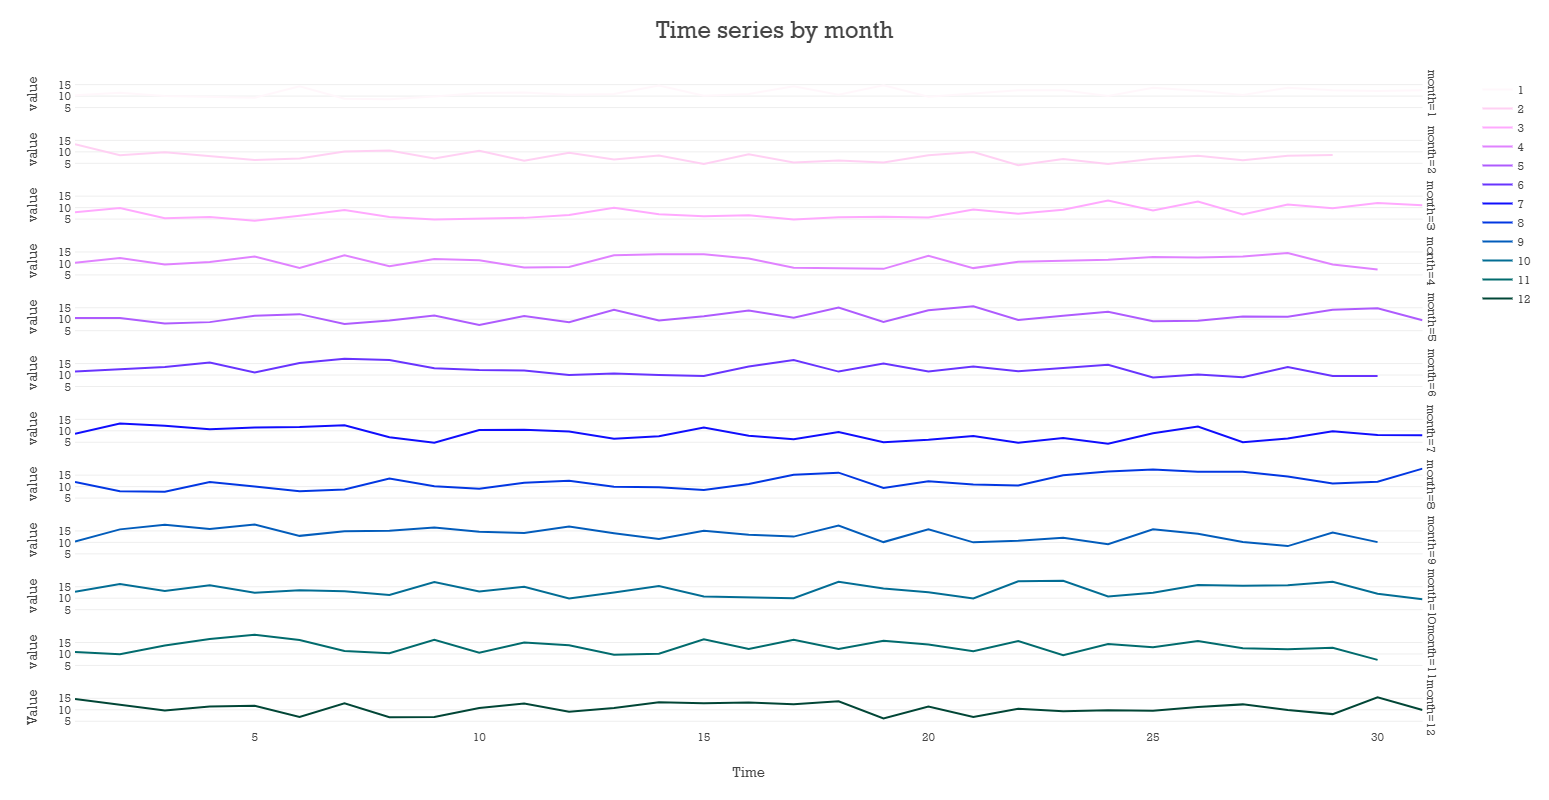

In [35]:
seasonal_time_series_plot(ts_df, period="month", subplots=True)

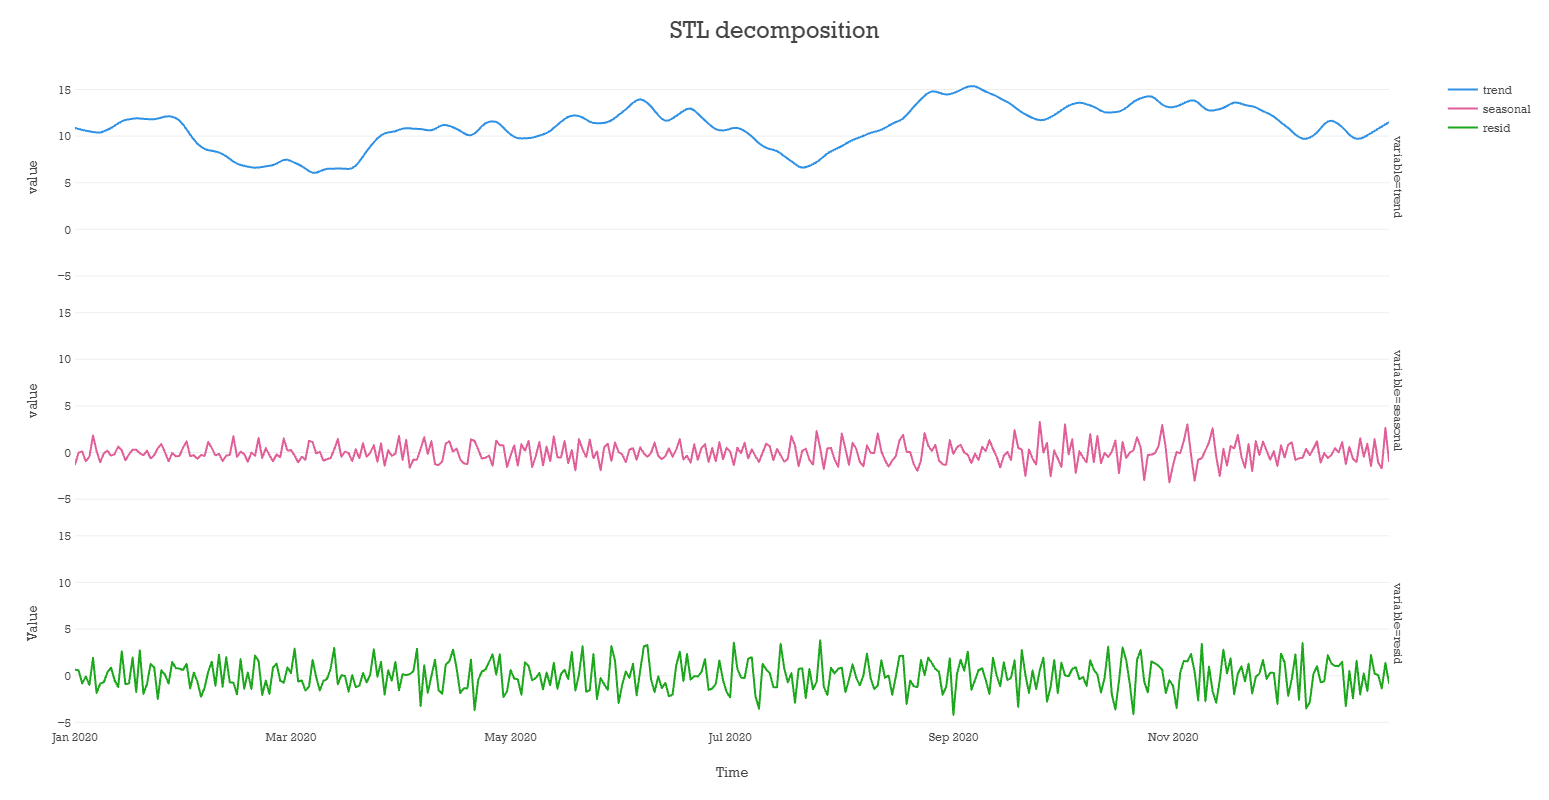

In [16]:
decomposed_time_series_plot(ts, method = "STL", subplots = True)

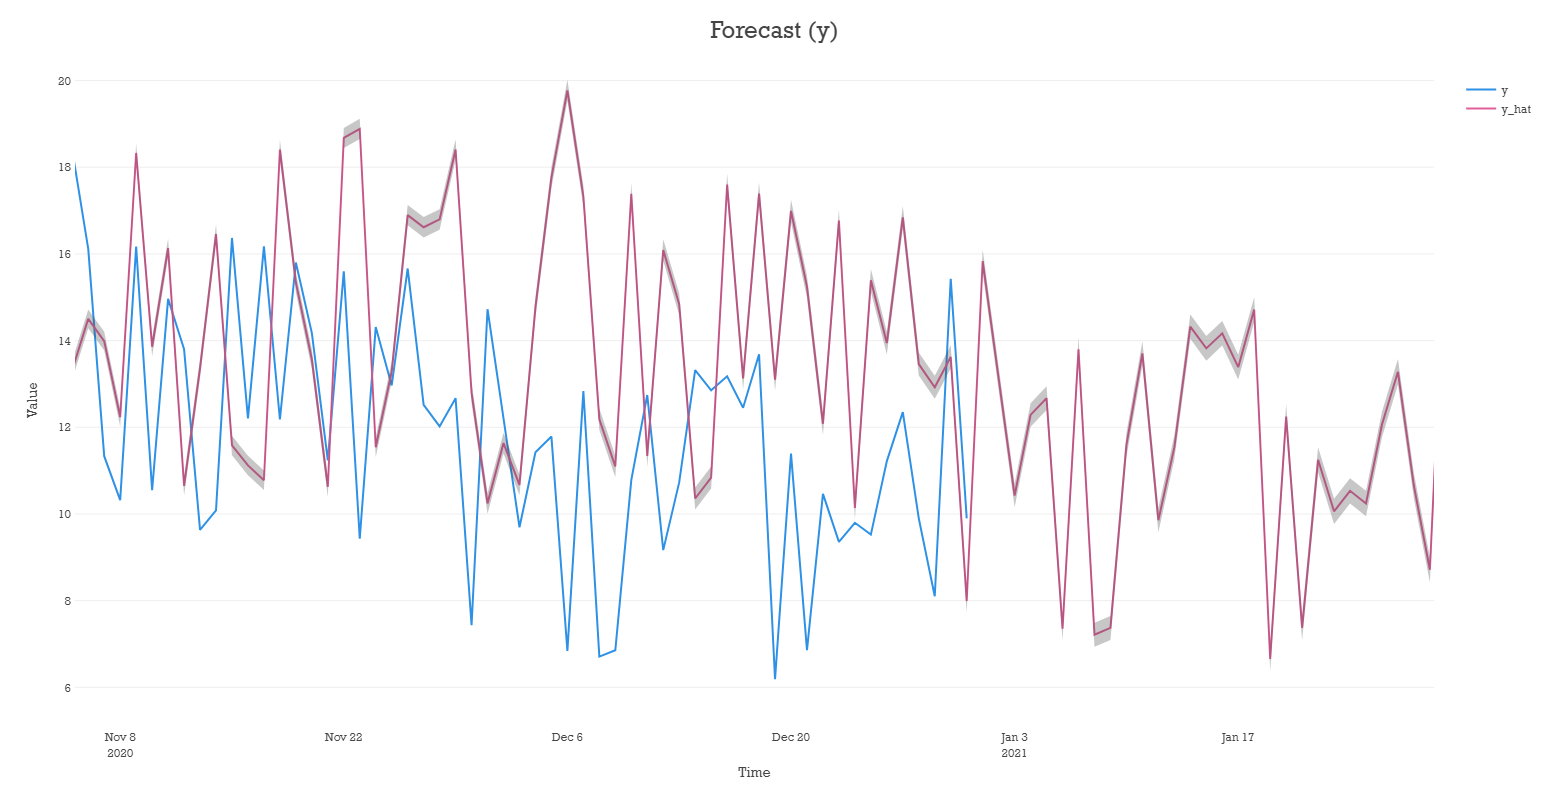

In [17]:
inverted_df = pd.DataFrame(total_df.values[::-1], total_df.index, total_df.columns)
#forecast_plot(inverted_df, ts_col = "y", fc_cols = ["y_hat"], lower_col = "lower confidence", upper_col = "upper confidence")

y_hat_2 = pd.Series(data=y_hat*0.9, index = ext_t_axis, name = "y_hat_2")
multiple_fc_df = pd.concat([total_df, y_hat_2], axis = 1)
forecast_plot(multiple_fc_df, ts_col = "y", fc_cols = ["y_hat"], upper_col = "upper confidence", lower_col = "lower confidence")

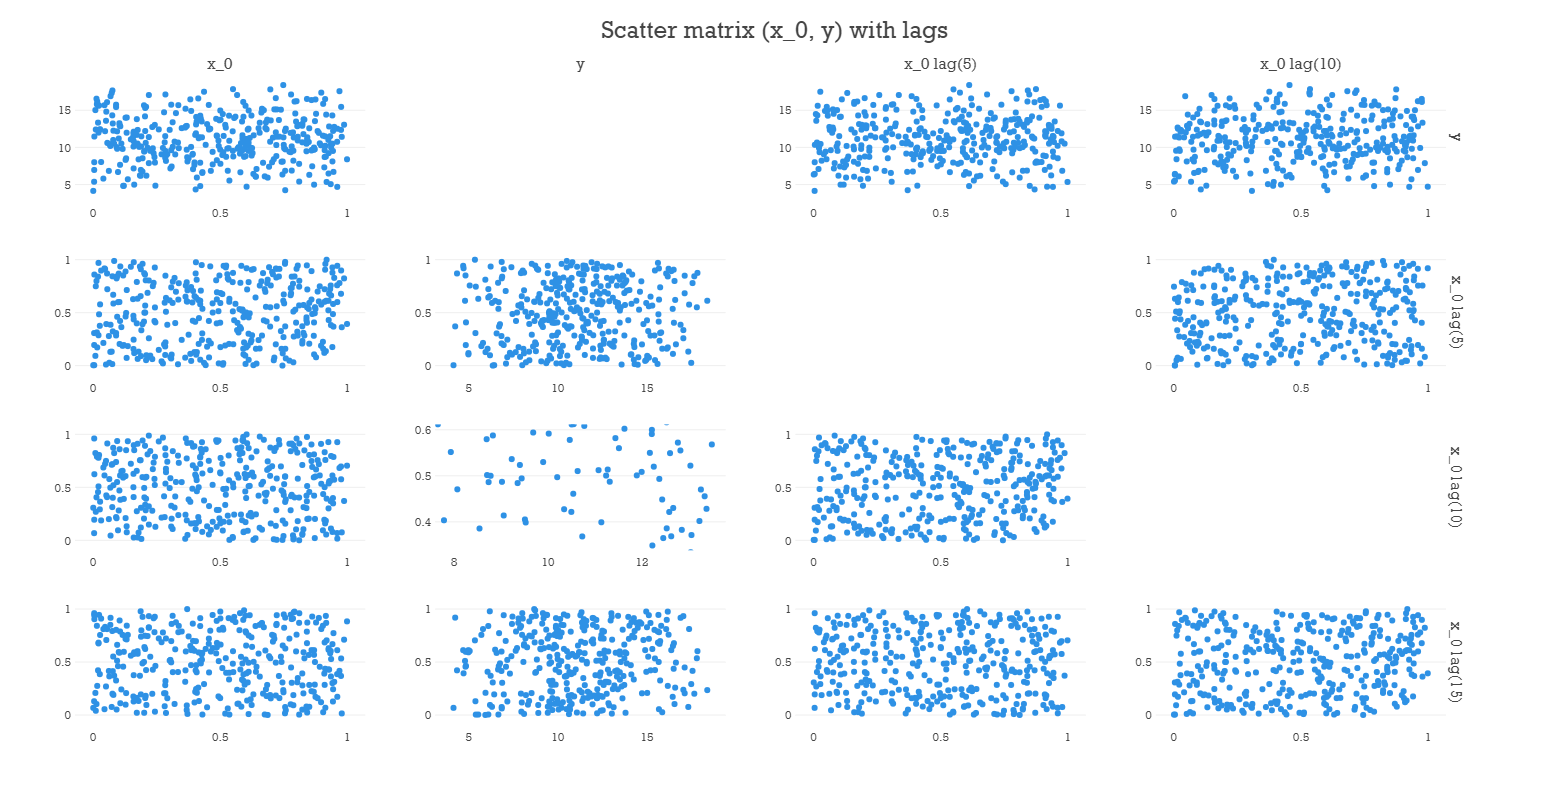

In [18]:
vars_scatterplot(total_df, var1 = "x_0", var2="y", lags1 = [5, 10, 15])

[autoreload of pytsviz.utils failed: Traceback (most recent call last):
  File "c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\IPython\extensions\autoreload.py", line 394, in superreload
    module = reload(module)
  File "C:\Users\GabrieleOrlandi\AppData\Local\Programs\Python\Python38-32\lib\imp.py", line 314, in reload
    return importlib.reload(module)
  File "C:\Users\GabrieleOrlandi\AppData\Local\Programs\Python\Python38-32\lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 783, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "C:\Users\GabrieleOrlandi\Desktop\Git\pyts

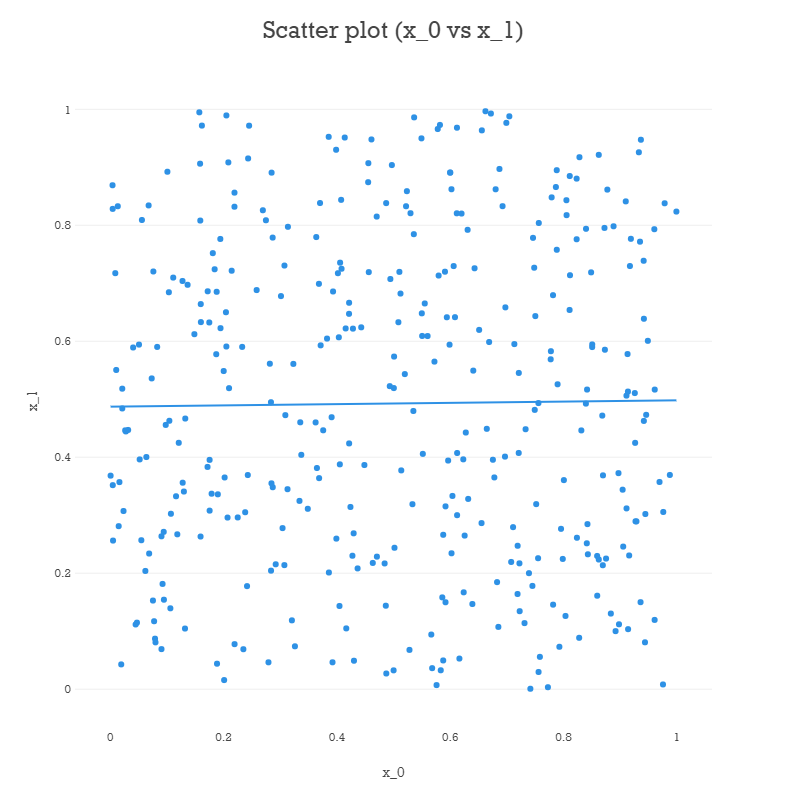

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                   0.04757
Date:                Mon, 01 Mar 2021   Prob (F-statistic):              0.827
Time:                        17:36:05   Log-Likelihood:                -50.302
No. Observations:                 366   AIC:                             104.6
Df Residuals:                     364   BIC:                             112.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4872      0.029     16.856      0.0

In [62]:
scatterplot(total_df, "x_0", "x_1", fit = "summary")

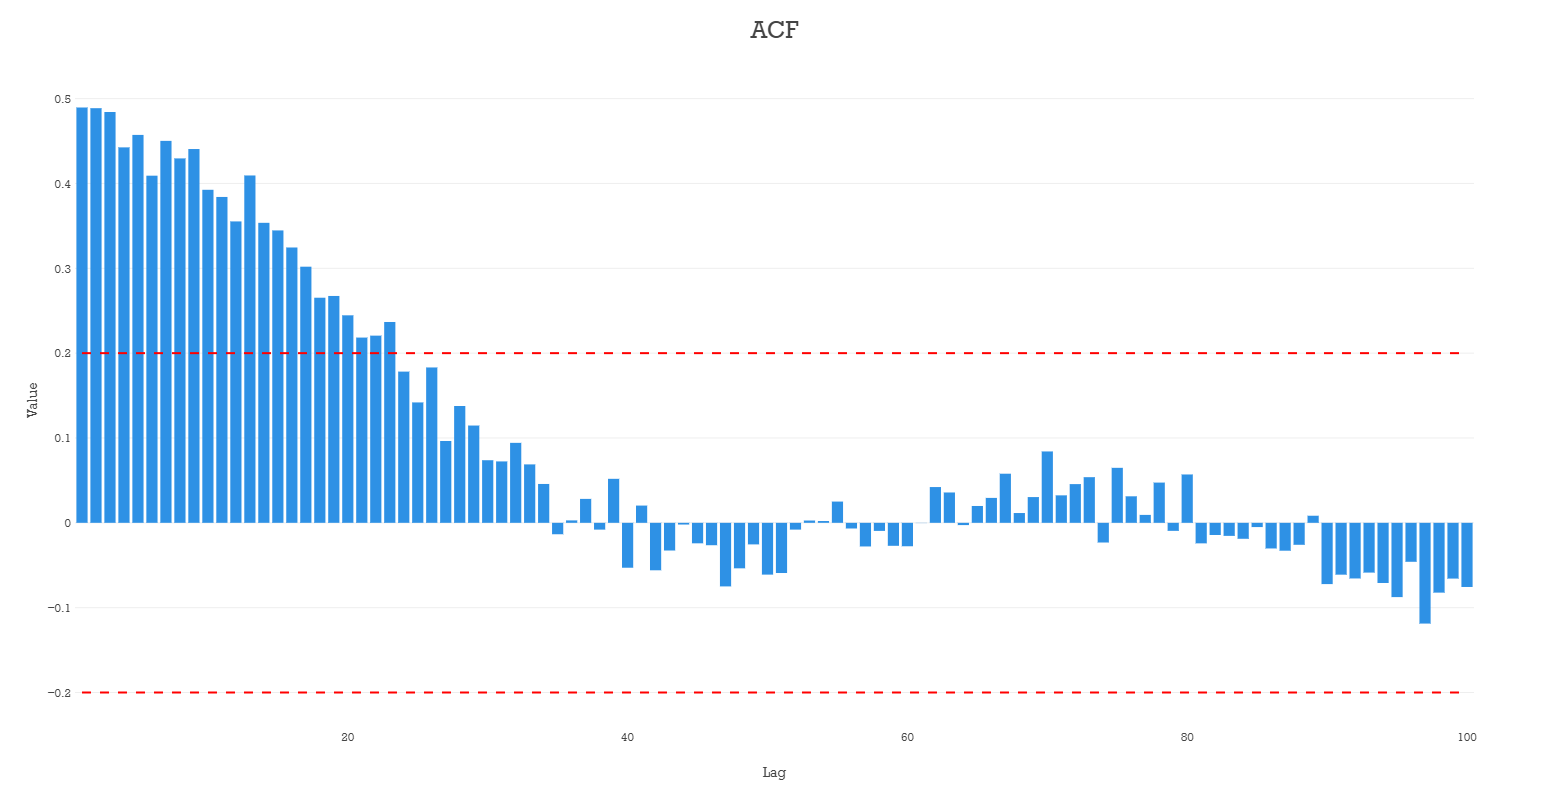

In [39]:
plotly_acf(y, 100, show_threshold = True)

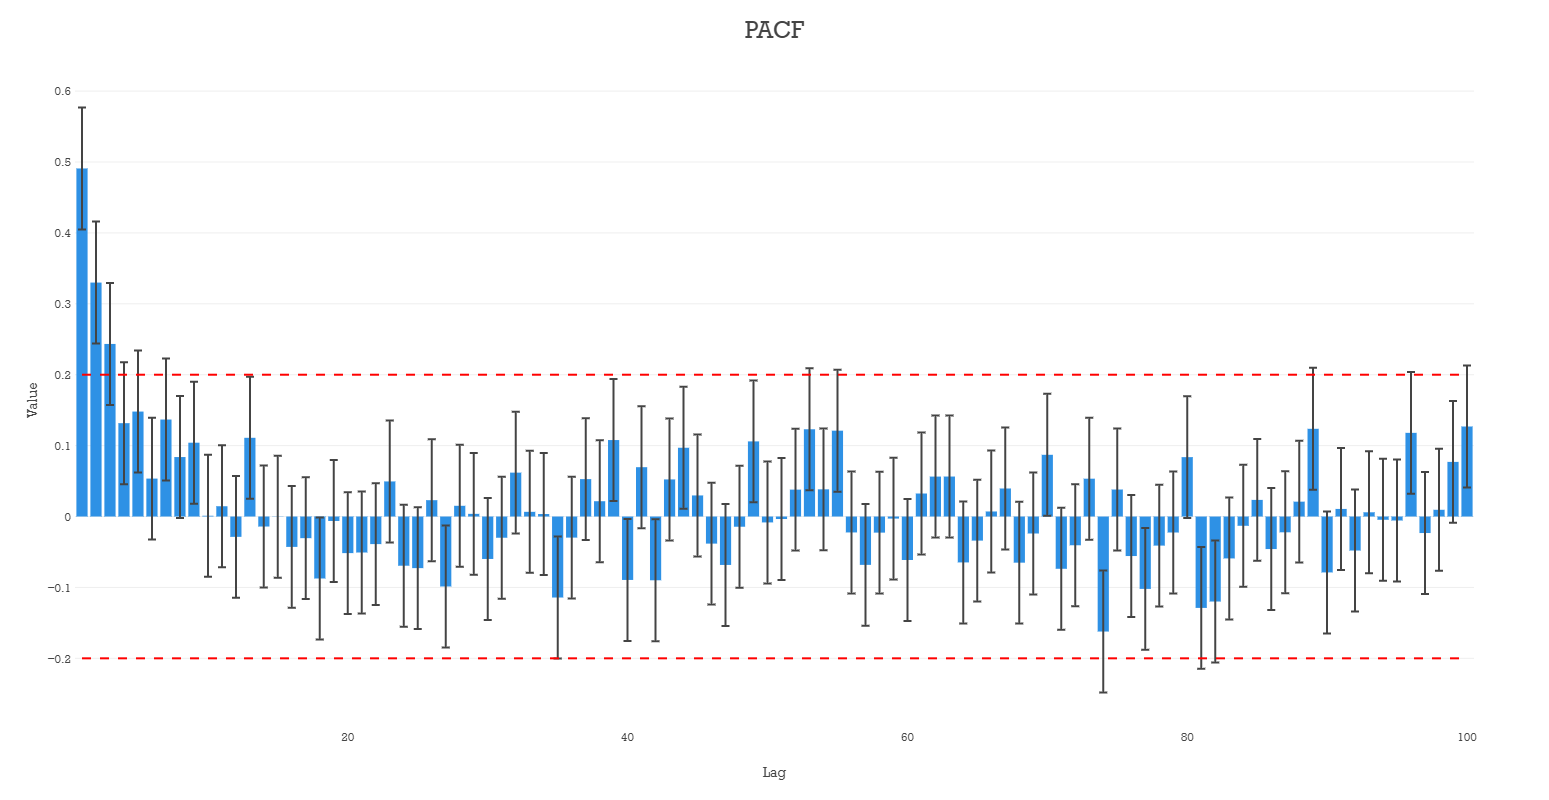

In [21]:
plotly_pacf(y, 100, alpha = 0.1, show_threshold = True)

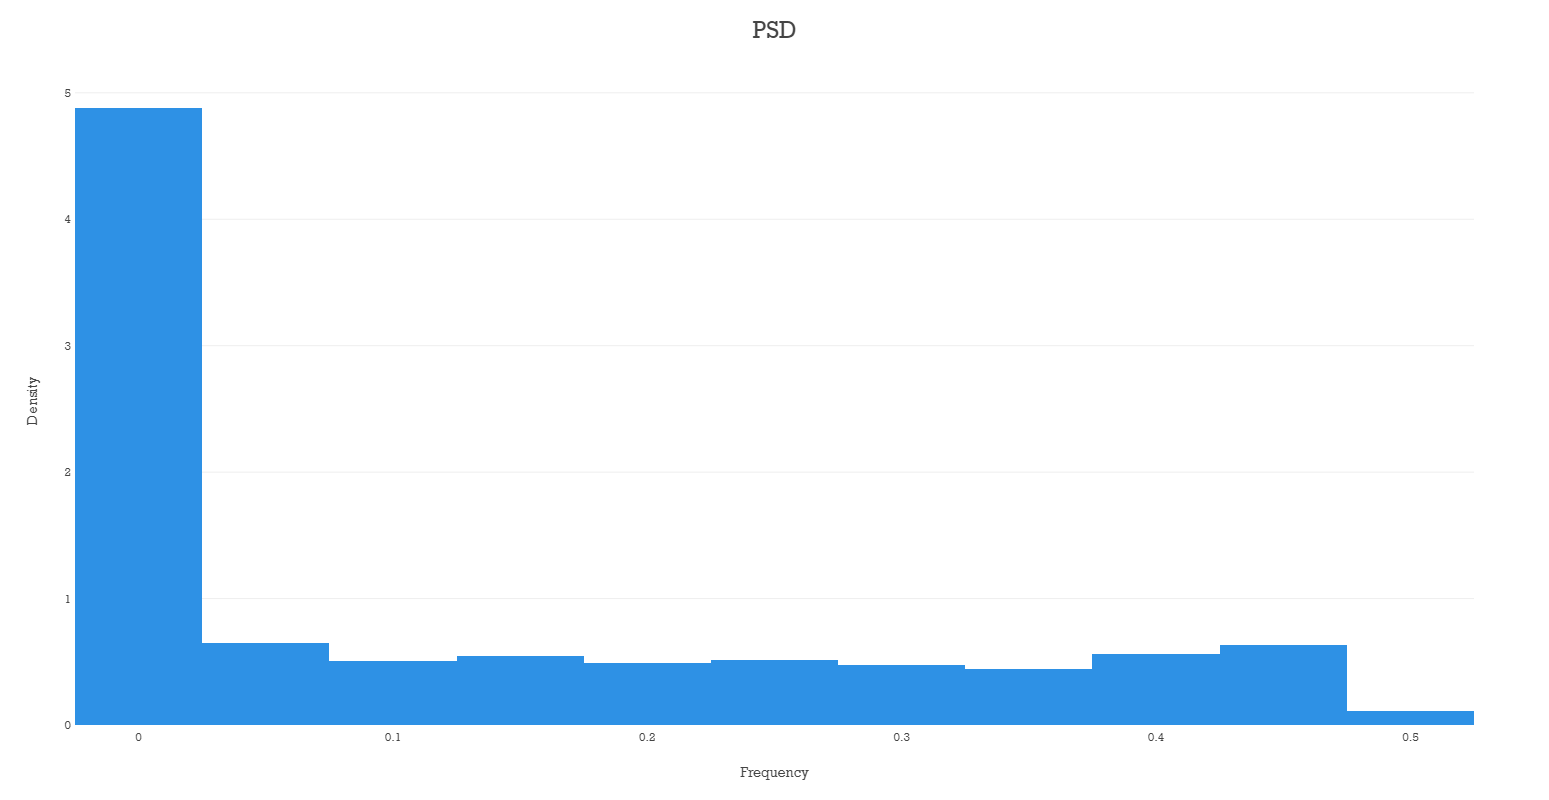

In [22]:
plotly_psd(y, scaling="spectrum")

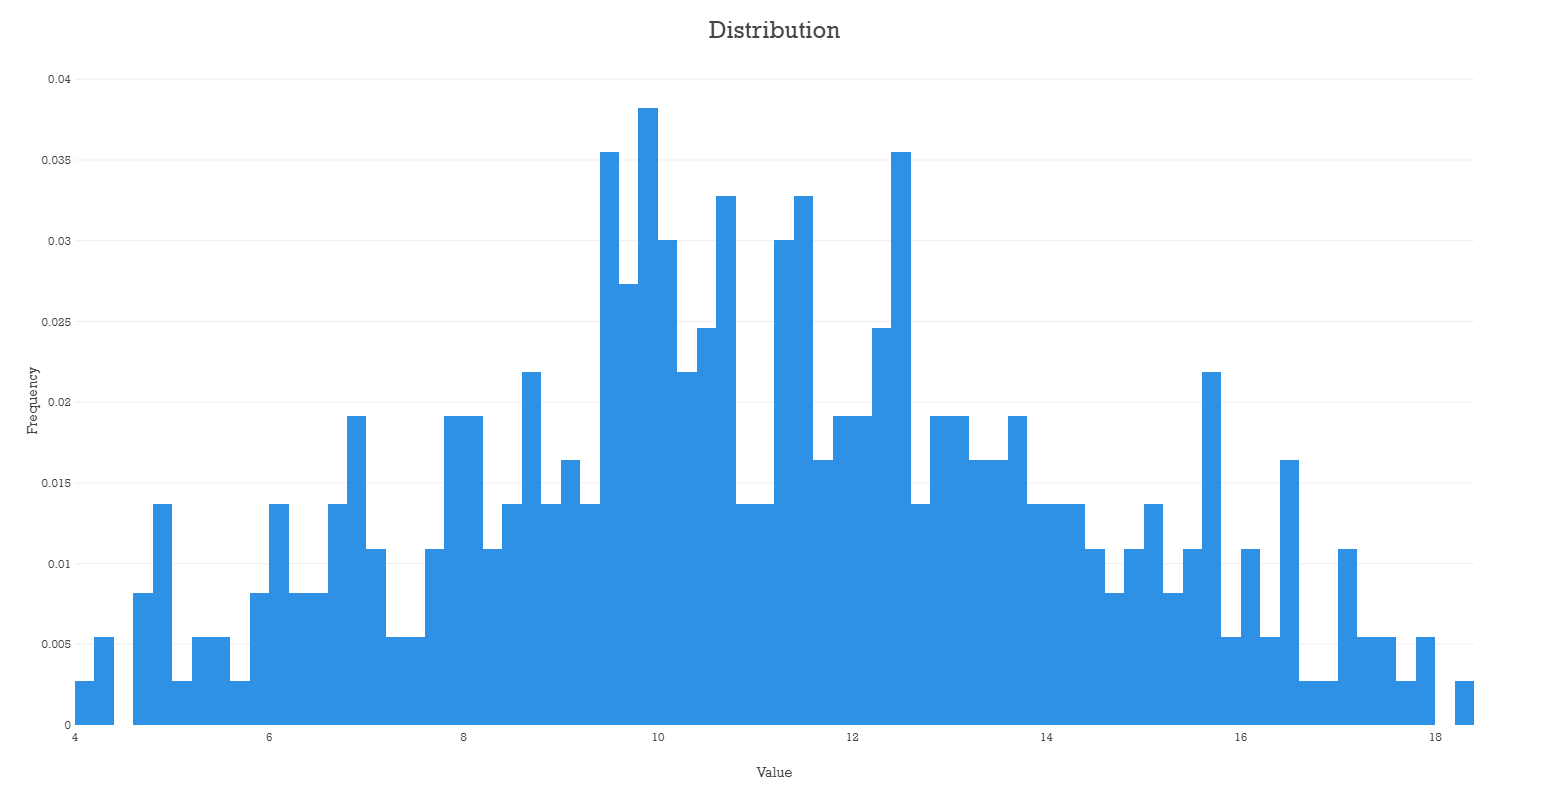

In [23]:
plot_distribution_histogram(ts, bins=100, title="Distribution")

In [24]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
arma_process = sm.tsa.ArmaProcess(ar, ma)

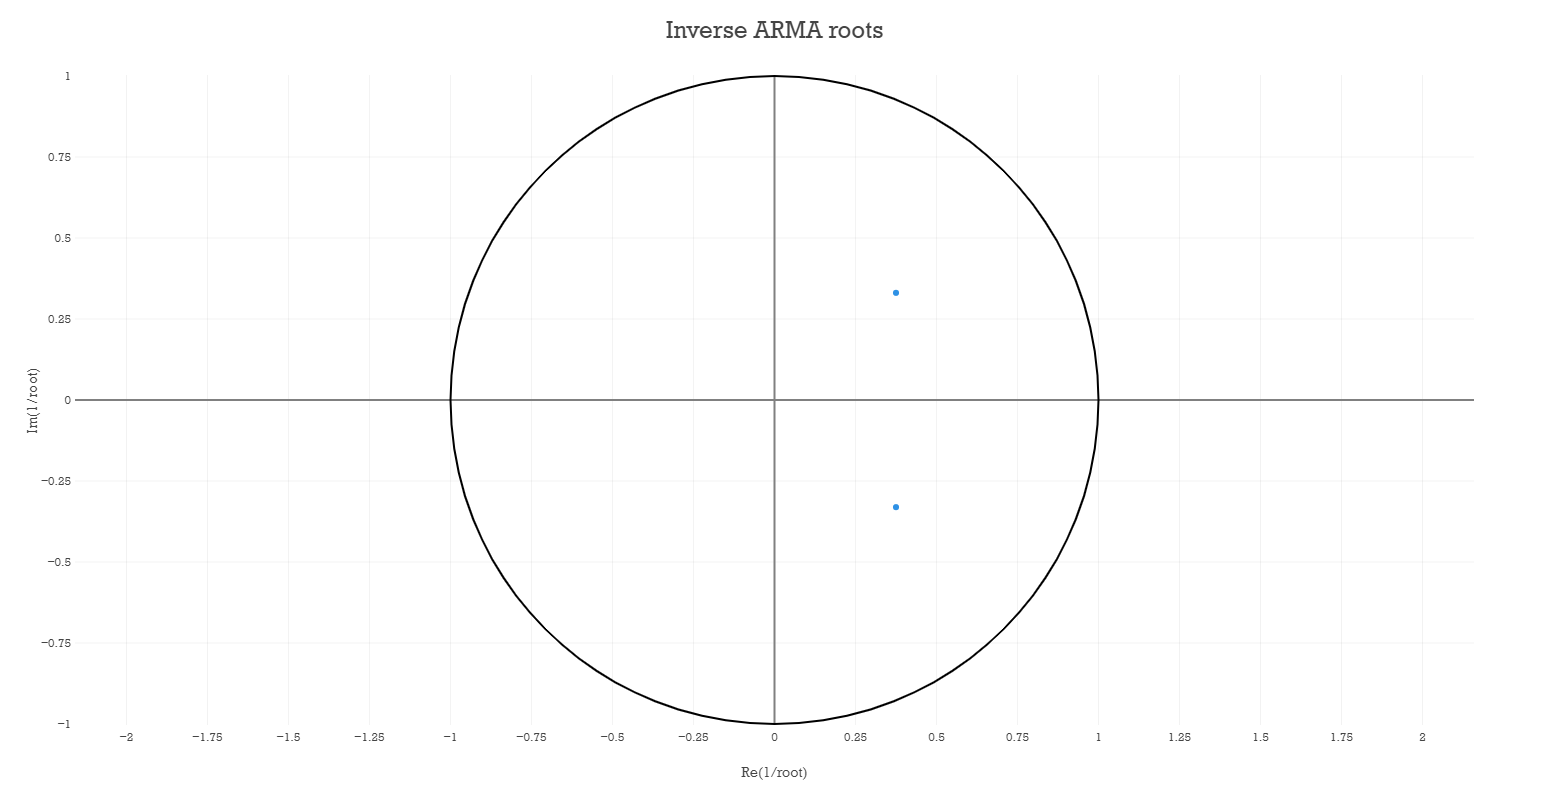

In [25]:
inverse_arma_roots_plot(arma_process)

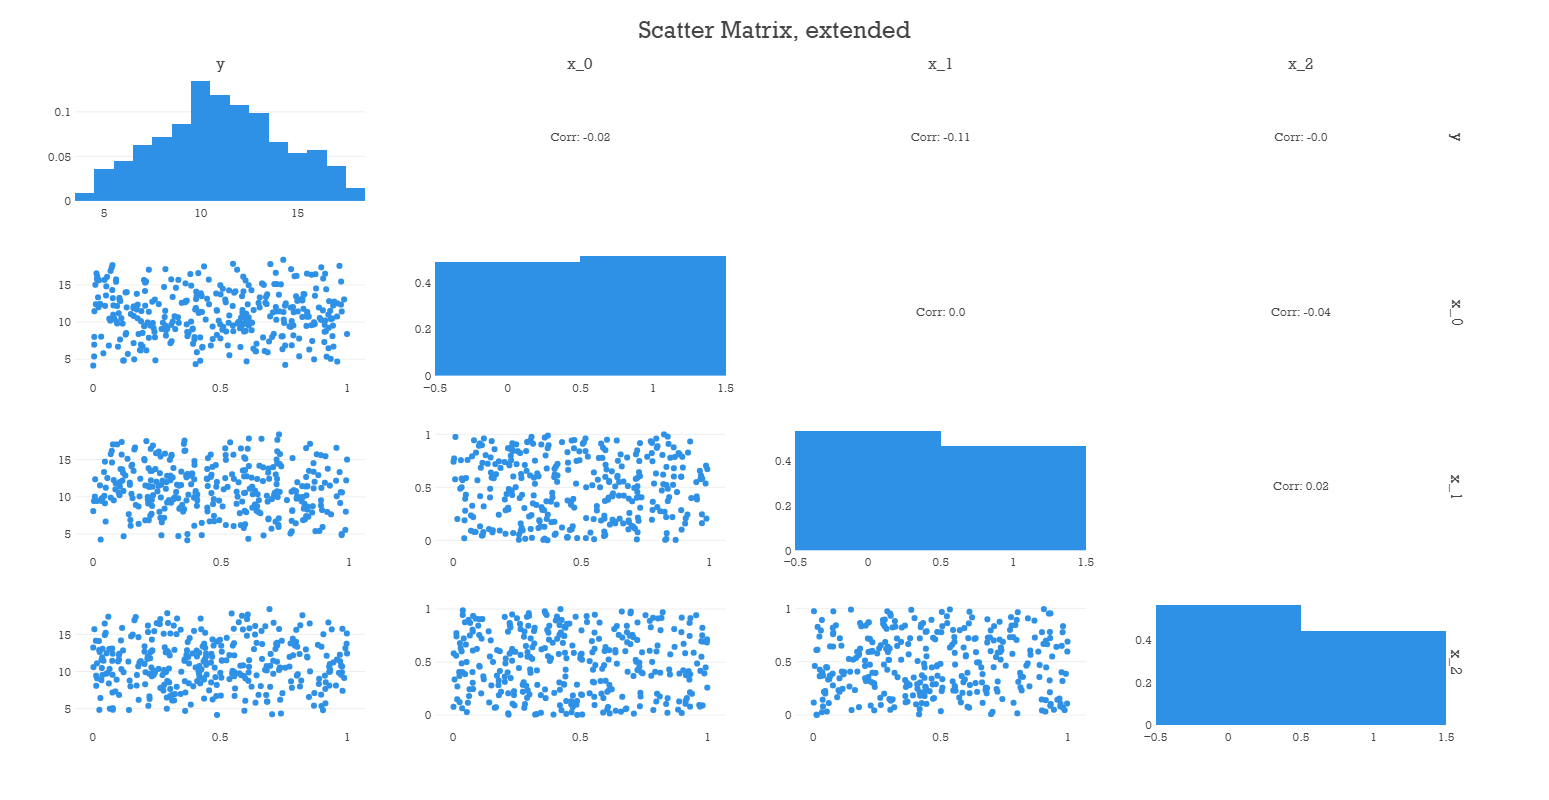

In [26]:
composite_matrix_scatterplot(total_df.dropna(), y_cols=["y", "x_0", "x_1", "x_2"])

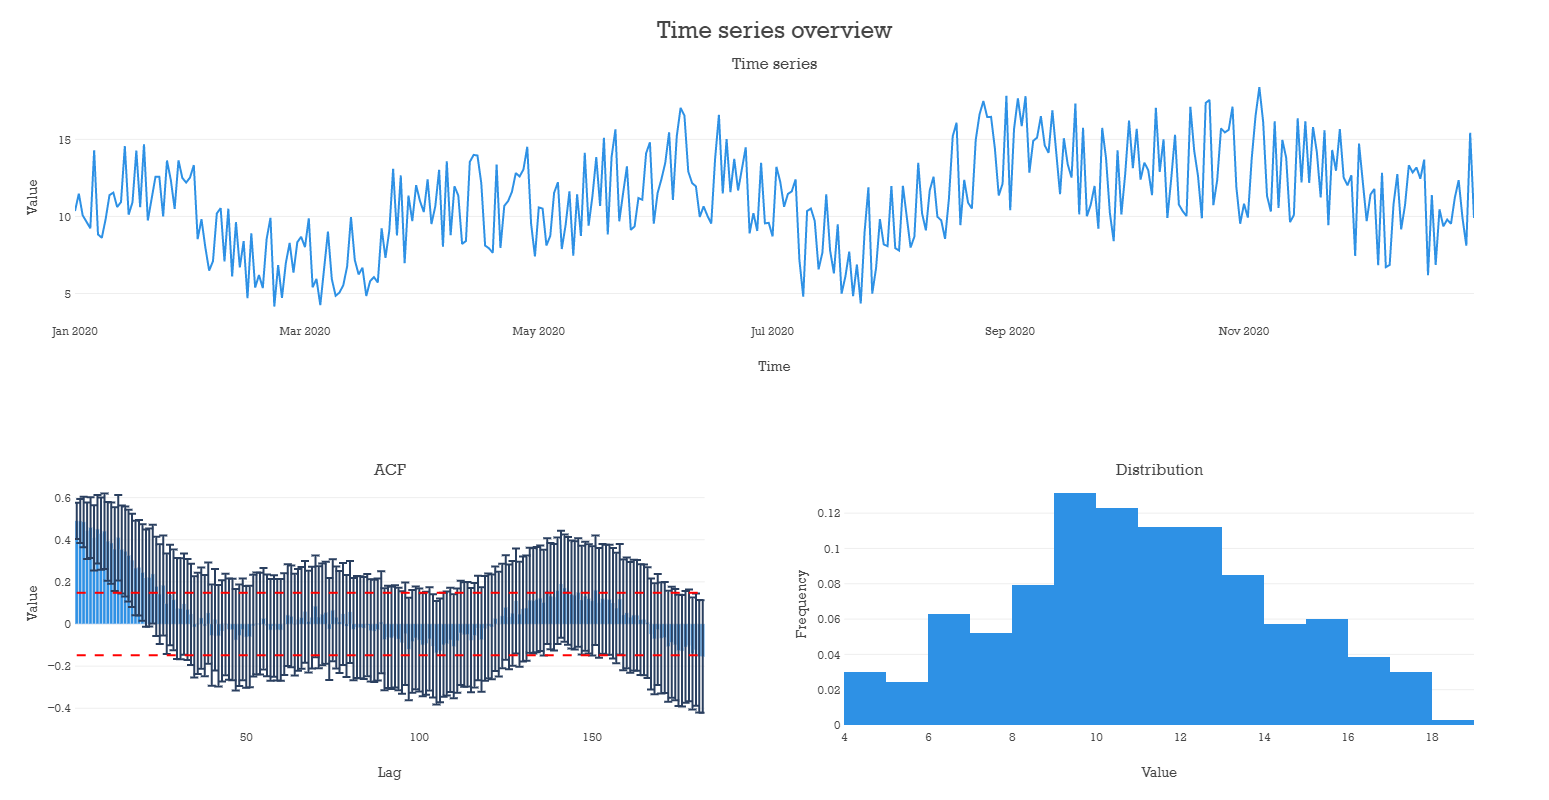

In [27]:
composite_summary_plot(ts)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



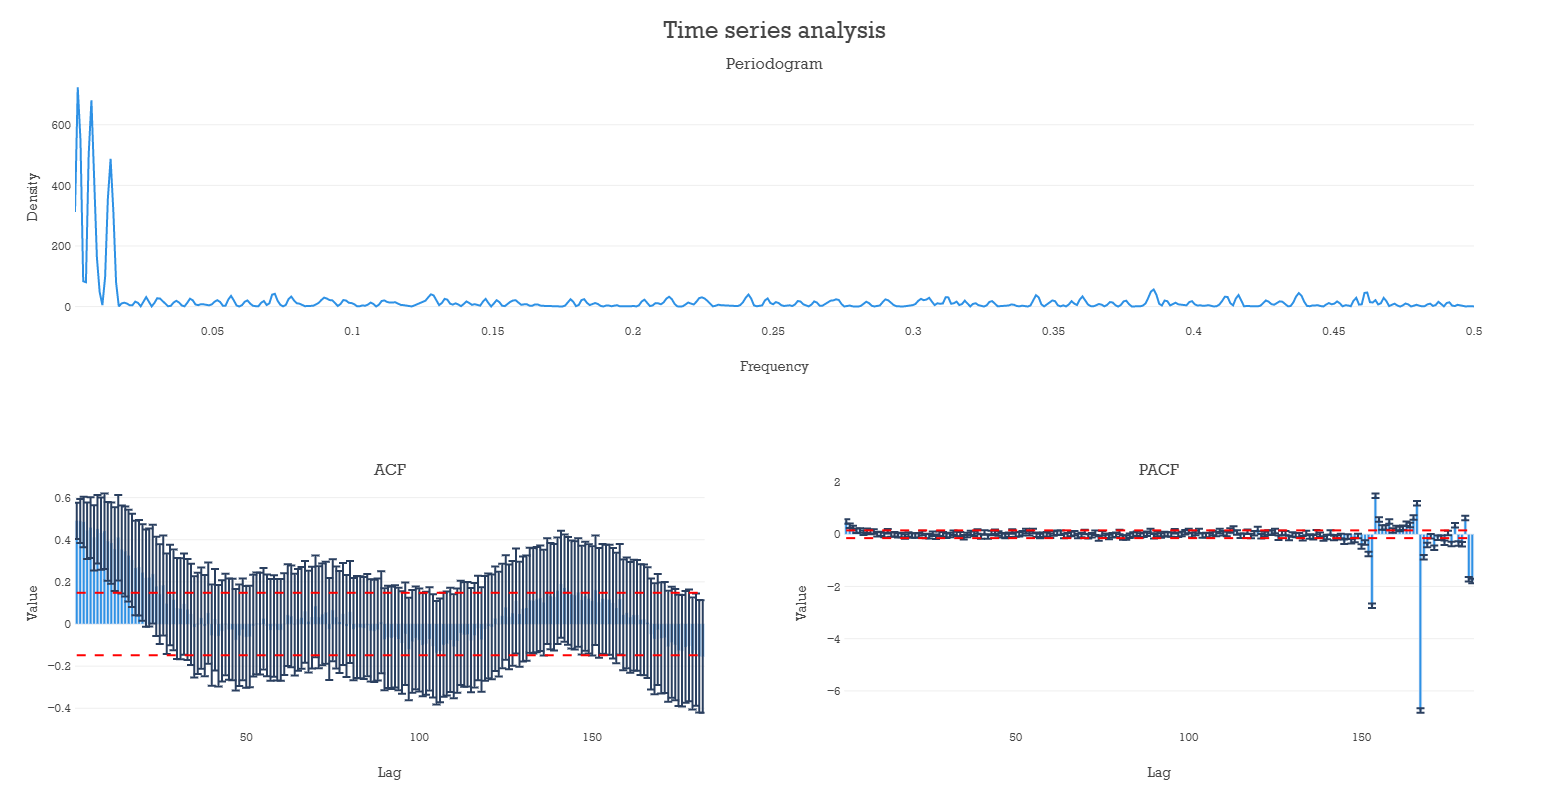

In [50]:
plotly_tsdisplay(ts)

c:\users\gabrieleorlandi\anaconda3\envs\pytsviz-mrya9sxp-py3.8\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning:

invalid value encountered in sqrt



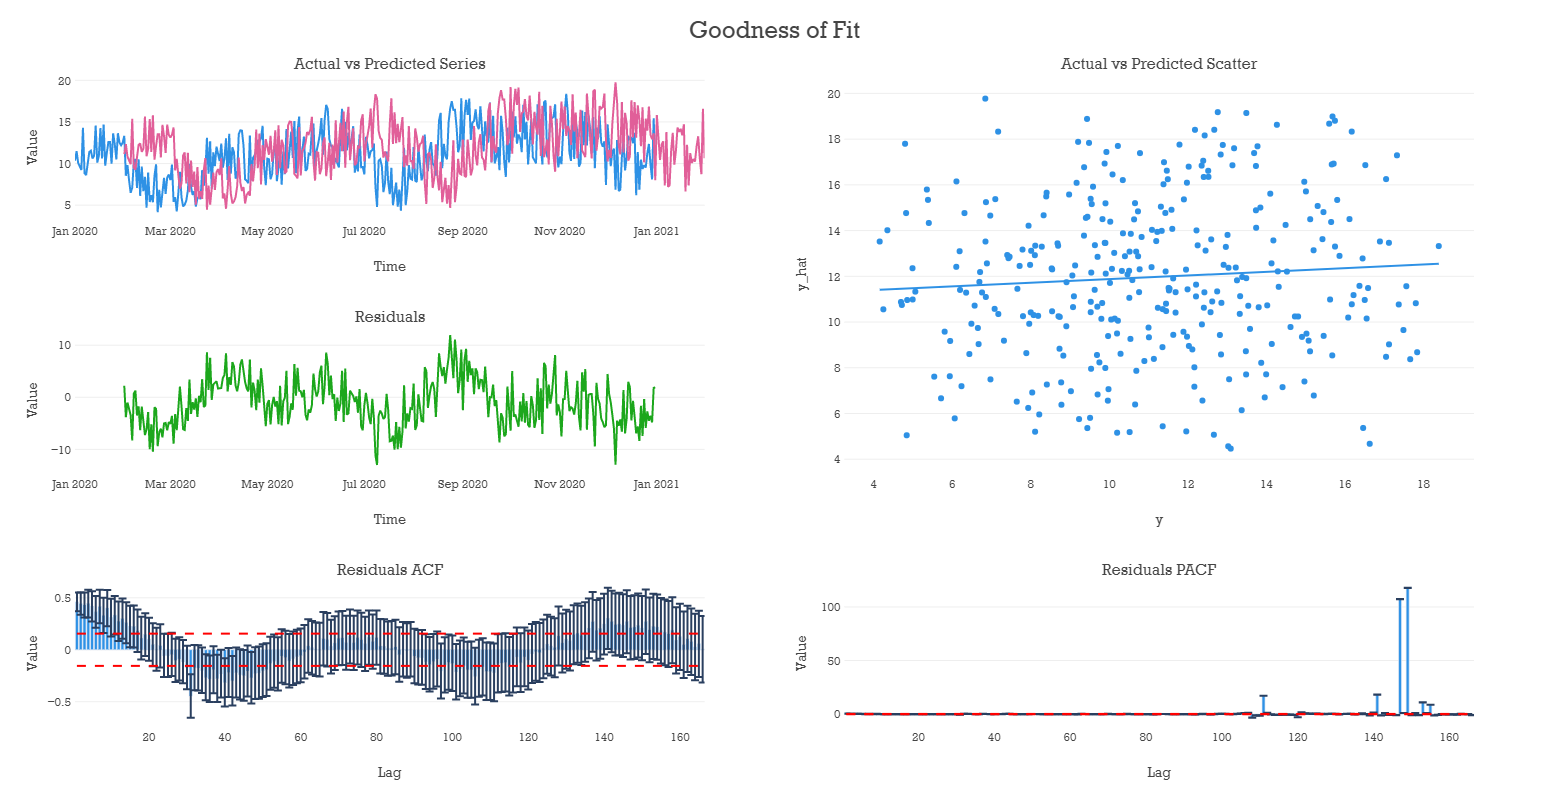

In [59]:
plot_gof(total_df, "y", "y_hat")